# Plot from Database Example

In [ ]:
import matplotlib.pyplot as plt
from sqlmodel import Session, create_engine, select

from cali.sqlmodel import (
    FOV,
    ROI,
    Traces,
)

In [5]:
database_path = "/Users/fdrgsp/Documents/git/cali/tests/test_data/evoked/evk_analysis/evk.tensorstore.zarr.db"
engine = create_engine(f"sqlite:///{database_path}")

Found 1 traces for position 0

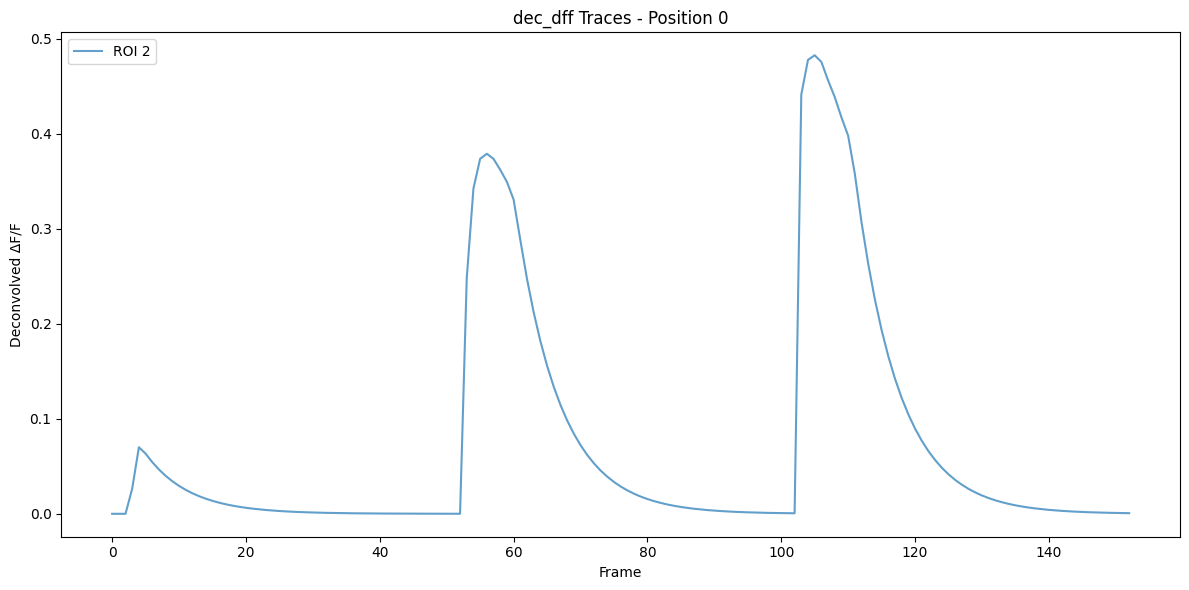

In [ ]:
# Query all traces for position 0 in a single efficient query
with Session(engine) as session:
    # Join Traces -> ROI -> FOV and filter by position_index
    statement = (
        select(Traces)
        .join(ROI)
        .join(FOV)
        .where(FOV.position_index == 0)
        .where(ROI.label_value == 2)
    )

    traces_list = session.exec(statement).all()

    # Plot all dec_dff traces
    fig, ax = plt.subplots(figsize=(12, 6))

    for trace in traces_list:
        if trace.dec_dff is not None:
            # Use x_axis if available, otherwise use frame numbers
            x_data = (
                trace.x_axis
                if trace.x_axis is not None
                else list(range(len(trace.dec_dff)))
            )
            ax.plot(
                x_data,
                trace.dec_dff,
                label=f"ROI {trace.roi.label_value}",
                alpha=0.7,
            )

    x_label = "Time (ms)" if traces_list and traces_list[0].x_axis else "Frame"
    ax.set_xlabel(x_label)
    ax.set_ylabel("Deconvolved ΔF/F")
    ax.set_title("dec_dff Traces - Position 0")
    ax.legend(loc="upper left")
    plt.tight_layout()
    plt.show()